## Задание

Цель: Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.

Описание задания:
В домашнем задании нужно решить задачу классификации типа стекол. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.


Этапы работы:

1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
2. Проведите первичный анализ.
    - Проверьте количество записей для каждого класса. Сделайте вывод.
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.
5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).
6. Обработайте выбросы в данных.
    - Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?
    - Исследуйте признаки на выбросы несколькими способами.
    -  Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.
7. Повторите п. 4, п. 5.
8. Сформулируйте выводы по проделанной работе.
    - Кратко опишите, какие преобразования были сделаны с данными.
    - Сравните точность двух моделей.
    - Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.
Для получения зачета по этому домашнему заданию минимально должны быть реализованы методы по поиску выбросов и построены две модели: «до» и «после» обработки экстремальных значений.

In [41]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import warnings
warnings.filterwarnings("ignore")


In [177]:
data_glass = pd.read_csv('/Users/sofagusina/Desktop/программирование/machine_learning/machine_learning/ML/Работа с признаками/Работа с выбросами и генерация новых признаков/glass.csv')


In [3]:
data_glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [14]:
data_glass['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [13]:
for column in data_glass.columns:
    if '?' in data_glass[column].unique():
        print(column)
    else:
        print(f'В столбце "{column}" пропусков нет')


В столбце "RI" пропусков нет
В столбце "Na" пропусков нет
В столбце "Mg" пропусков нет
В столбце "Al" пропусков нет
В столбце "Si" пропусков нет
В столбце "K" пропусков нет
В столбце "Ca" пропусков нет
В столбце "Ba" пропусков нет
В столбце "Fe" пропусков нет
В столбце "Type" пропусков нет


В данных отсутствуют пропуски

Обучение модели случайного леса на данных, в которых не произведена работа с выбросами

In [24]:
X = data_glass.drop(columns='Type')
Y = data_glass['Type']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier

Найдем наиболее оптимальные параметры для построения алгоритма случайного леса

In [146]:
# Сделаем инициализацию параметров, по которым хотим сделать полный перебор
parameters = {'max_features': [1, 3, 6, 9], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20]}

rfc = RandomForestClassifier(n_estimators=10, random_state=42,n_jobs=-1, oob_score=True)

gcv = GridSearchCV(rfc, parameters, n_jobs=-1, verbose=1)
gcv.fit(X_train, y_train)
gcv.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


{'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 1}

Наиболее оптимальные параметры max_depth=10, max_features=3, min_samples_leaf=1. Обучим модель на этих параметрах (только 'min_samples_leaf' будет равно 3, так как в ниже расположенном коде будет выяснено, что при min_samples_leaf = 1 модель всегда переобучается )

In [215]:
rfc_model = RandomForestClassifier(max_depth=10,max_features=3,min_samples_leaf=3)
rfc_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=3, min_samples_leaf=3)

In [216]:
pred = rfc_model.predict(X_test)
pred

array([2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1.,
       2., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2.])

Оценим точность модели с помощью метрик accuracy, recall и precision

In [218]:
print(f'Точность предсказания модели accuracy на тестовой выборке {rfc_model.score(X_test,y_test)}, на обучающей выборке - {rfc_model.score(X_train,y_train)}')
print(f"Полнота модели recall {recall_score(y_test,pred,average='macro')}")
print(f"Точность модели precision {precision_score(y_test,pred,average='macro')}")

Точность предсказания модели accuracy на тестовой выборке 0.75, на обучающей выборке - 0.8888888888888888
Полнота модели recall 0.45
Точность модели precision 0.375


Как видно по подсчитанным метрикам, модель демонстрирует невысокое качество Возможно, это связано с выбросами в данных. Проведем работу с выбросами

Визуализируем выбросы

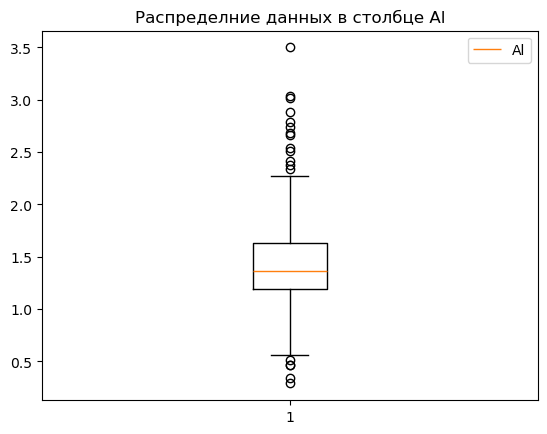

In [50]:
plt.boxplot(x=data_glass['Al'],label='Al')
plt.legend()
plt.title('Распределние данных в столбце Al')
plt.show()

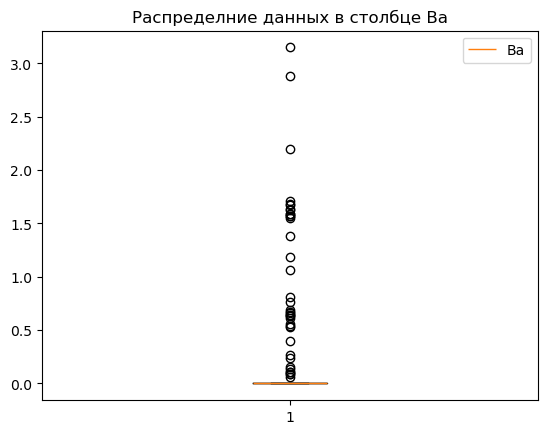

In [60]:
plt.boxplot(x=data_glass['Ba'],label='Ba')
plt.legend()
plt.title('Распределние данных в столбце Ba')
plt.show()

RI	Na	Mg	Al	Si	K	Ca	Ba	Fe	Type

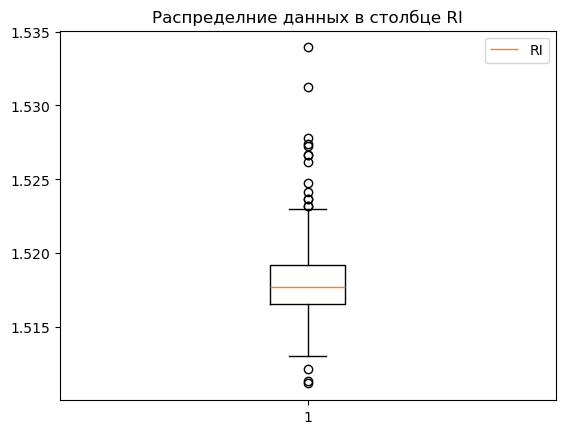

In [52]:
plt.boxplot(x=data_glass['RI'],label='RI')
plt.legend()
plt.title('Распределние данных в столбце RI')
plt.show()

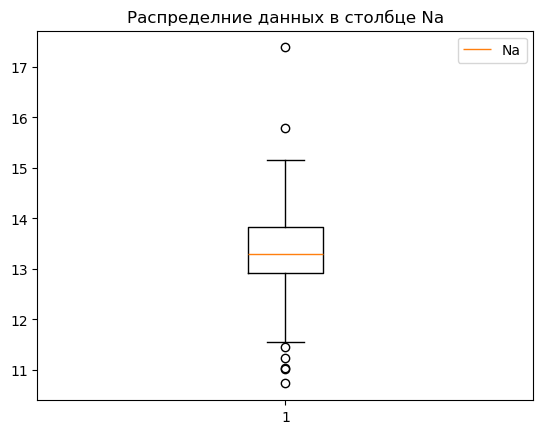

In [53]:
plt.boxplot(x=data_glass['Na'],label='Na')
plt.legend()
plt.title('Распределние данных в столбце Na')
plt.show()

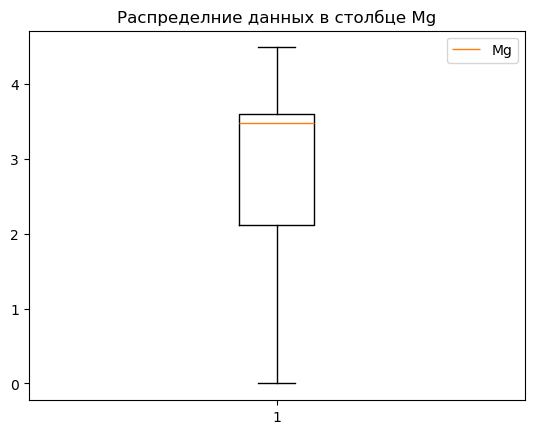

In [54]:
plt.boxplot(x=data_glass['Mg'],label='Mg')
plt.legend()
plt.title('Распределние данных в столбце Mg')
plt.show()

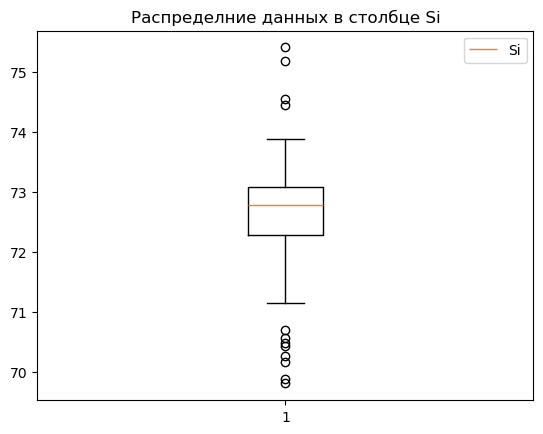

In [55]:
plt.boxplot(x=data_glass['Si'],label='Si')
plt.legend()
plt.title('Распределние данных в столбце Si')
plt.show()

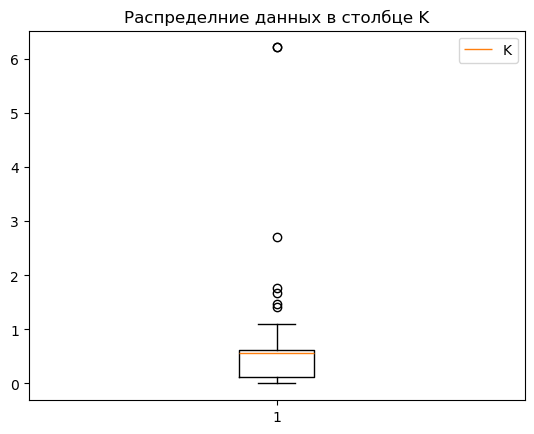

In [56]:
plt.boxplot(x=data_glass['K'],label='K')
plt.legend()
plt.title('Распределние данных в столбце K')
plt.show()

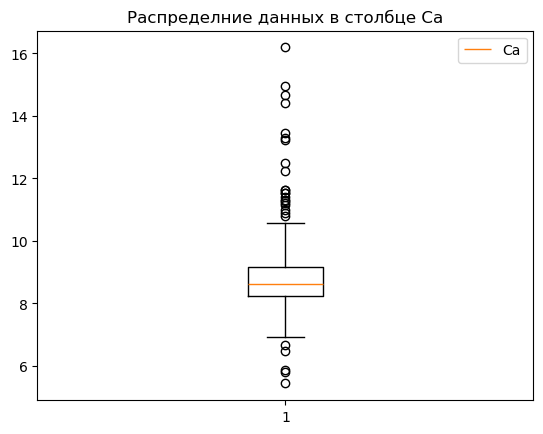

In [57]:
plt.boxplot(x=data_glass['Ca'],label='Ca')
plt.legend()
plt.title('Распределние данных в столбце Ca')
plt.show()

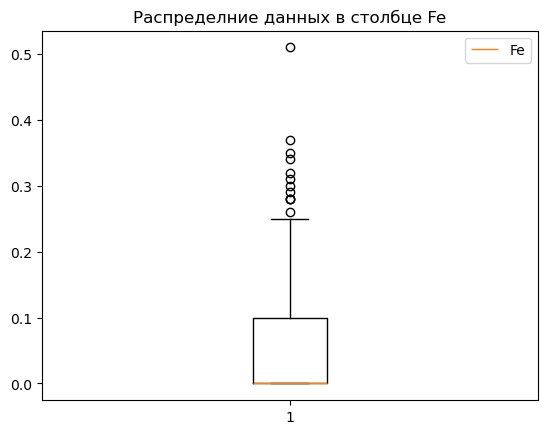

In [59]:
plt.boxplot(x=data_glass['Fe'],label='Fe')
plt.legend()
plt.title('Распределние данных в столбце Fe')
plt.show()

Больше всего выбросов наблюдается в столбцах "Ca", "Ba", "Al"

Нет выбросов в столбце 'Mg'

Посмотрим конкретное число выбросов 

In [118]:
outliers_count = {}
for column in data_glass.columns:
    Q1 = data_glass[column].quantile(0.25)
    Q3 = data_glass[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_glass[(data_glass[column] < lower_bound) | (data_glass[column] > upper_bound)]
    outliers_count[column] = outliers.shape[0]
    

# Выводим результат
for col, count in outliers_count.items():
    print(f"{col}: {count} выбросов")




RI: 17 выбросов
Na: 7 выбросов
Mg: 0 выбросов
Al: 18 выбросов
Si: 12 выбросов
K: 7 выбросов
Ca: 28 выбросов
Ba: 38 выбросов
Fe: 12 выбросов
Type: 29 выбросов


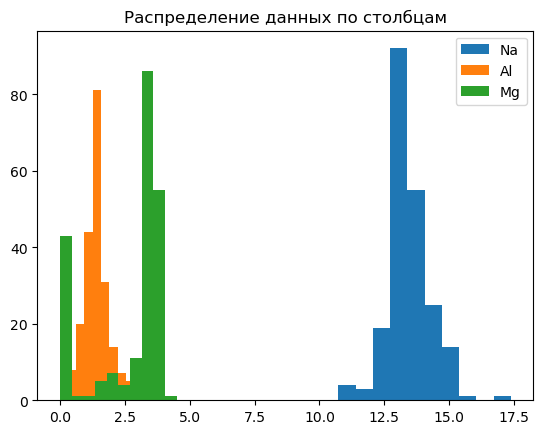

In [75]:
plt.hist(x=data_glass['Na'], label='Na')
plt.hist(x=data_glass['Al'], label = 'Al')
plt.hist(x=data_glass['Mg'],label = 'Mg')
plt.legend()
plt.title('Распределение данных по столбцам')
plt.show()

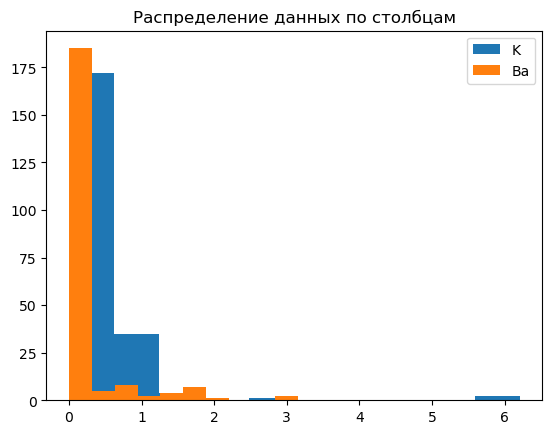

In [84]:

plt.hist(x=data_glass['K'], label = 'K')
plt.hist(x=data_glass['Ba'],label = 'Ba')
plt.legend()
plt.title('Распределение данных по столбцам')
plt.show()

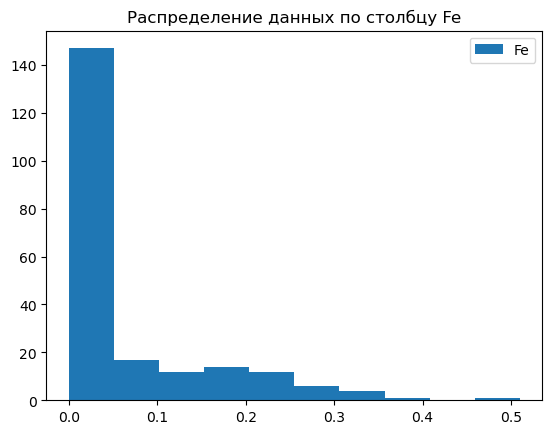

In [94]:

plt.hist(x=data_glass['Fe'], label='Fe')
plt.legend()
plt.title('Распределение данных по столбцy Fe')
plt.show()

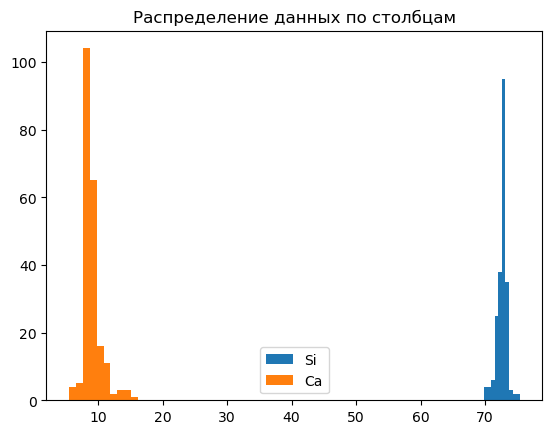

In [93]:
plt.hist(x=data_glass['Si'], label='Si')
plt.hist(x=data_glass['Ca'], label='Ca')
plt.legend()
plt.title('Распределение данных по столбцам')
plt.show()

Почти все столбцы, кроме столбцов 'Fe', 'Ca','Ba', имеют распределение, близкое к нормальному. Приведем данные этих столбцов к нормальному распределению

In [112]:

print("Нулей:", (data_glass['Ba'] == 0).sum())
print("Отрицательных:", (data_glass['Ba'] < 0).sum())

Нулей: 176
Отрицательных: 0


In [111]:

print("Нулей:", (data_glass['Fe'] == 0).sum())
print("Отрицательных:", (data_glass['Fe'] < 0).sum())

Нулей: 144
Отрицательных: 0


In [110]:

print("Нулей:", (data_glass['Ca'] == 0).sum())
print("Отрицательных:", (data_glass['Ca'] < 0).sum())

Нулей: 0
Отрицательных: 0


Так как в столбцах "Fe" и "Ba" есть нули, а логарифма 0 не существует, то нормализируем только признак "Ca"

In [113]:
data_glass['Ca'] = np.log(data_glass['Ca'])
data_glass['Ca']

0      2.169054
1      2.057963
2      2.051556
3      2.106570
4      2.088153
         ...   
209    2.217027
210    2.128232
211    2.132982
212    2.137710
213    2.154085
Name: Ca, Length: 214, dtype: float64

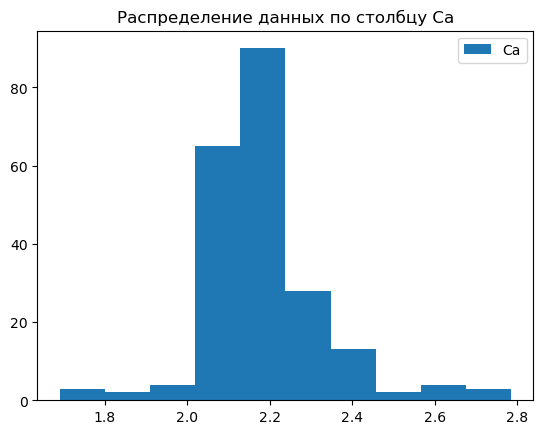

In [114]:
plt.hist(x=data_glass['Ca'], label='Ca')
plt.legend()
plt.title('Распределение данных по столбцy Ca')
plt.show()

Попробуем заменить выбросы на медианы по столбцам

In [121]:
for column in data_glass.columns:
    Q1 = data_glass[column].quantile(0.25)
    Q3 = data_glass[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_glass[column] = data_glass[column].where((data_glass[column] >= lower_bound) & (data_glass[column] <= upper_bound), other=data_glass[column].median())

In [122]:
data_glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 16.8 KB


Обучим модель на новых данных

In [125]:
X_1 = data_glass.drop(columns='Type')
Y_1 = data_glass['Type']


In [131]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,Y_1, test_size=0.2,random_state=42)

In [150]:
rfc_model_1 = RandomForestClassifier(max_depth=10,max_features=3,min_samples_leaf=1)
rfc_model_1.fit(X_train_1,y_train_1)

RandomForestClassifier(max_depth=10, max_features=3)

In [151]:
pred_1 = rfc_model_1.predict(X_test)

In [154]:
print(f'Точность предсказания модели accuracy на тестовой выборке {rfc_model_1.score(X_test_1,y_test_1)}, на обучающей выборке - {rfc_model_1.score(X_train_1,y_train_1)}')
print(f"Полнота модели recall {recall_score(y_test_1,pred_1,average='macro')}")
print(f"Точность модели precision {precision_score(y_test_1,pred_1,average='macro')}")

Точность предсказания модели accuracy на тестовой выборке 0.8837209302325582, на обучающей выборке - 1.0
Полнота модели recall 0.7244862417276211
Точность модели precision 0.9000884173297967


При одинаковых параметрах алгоритма точность модели повысилась, но она переобучается при подобранном параметре 'min_samples_leaf': 1. Попробуем изменить параметры

In [145]:
parameters = {'max_features': [1, 3, 6, 9], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20]}

rfc_1 = RandomForestClassifier(n_estimators=10, random_state=42,n_jobs=-1, oob_score=True)

gcv_1 = GridSearchCV(rfc_1, parameters, n_jobs=-1, verbose=1)
gcv_1.fit(X_train_1, y_train_1)
gcv_1.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


{'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 1}

Параметры остались такими же. Попробуем изменить количество элементов в узлах, чтобы посмотреть, останется ли переобучение

In [169]:
rfc_model_2 = RandomForestClassifier(max_depth=10,max_features=3,min_samples_leaf=3)
rfc_model_2.fit(X_train_1,y_train_1)

RandomForestClassifier(max_depth=10, max_features=3, min_samples_leaf=3)

In [170]:
pred_2 = rfc_model_1.predict(X_test)

In [176]:
print(f'Точность предсказания модели accuracy на тестовой выборке {rfc_model_2.score(X_test_1,y_test_1)}, на обучающей выборке - {rfc_model_2.score(X_train_1,y_train_1)}')
print(f"Полнота модели recall {recall_score(y_test_1,pred_1,average='macro')}")
print(f"Точность модели precision {precision_score(y_test_1,pred_1,average='macro')}")

Точность предсказания модели accuracy на тестовой выборке 0.8837209302325582, на обучающей выборке - 0.9298245614035088
Полнота модели recall 0.7244862417276211
Точность модели precision 0.9000884173297967


При минимальном числе элементов в узлах, равном 3, метрика accuracy на тестовой выборке не изменилась и снизилась на обучающей, что говорит о том, что модель не переобучается. Но по сравнению с метрикой accuracy модели, которая обучалась на данных с пропусками, метрика данной модели выше.

Попробуем удалить выбросы из данных

In [196]:
data_glass = pd.read_csv('/Users/sofagusina/Desktop/программирование/machine_learning/machine_learning/ML/Работа с признаками/Работа с выбросами и генерация новых признаков/glass.csv')
data_glass_value = data_glass.shape[0]

In [197]:
for column in data_glass.columns:
    Q1 = data_glass[column].quantile(0.25)
    Q3 = data_glass[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_glass[column] = data_glass[column].where((data_glass[column] >= lower_bound) & (data_glass[column] <= upper_bound), other=np.nan)

In [198]:

data_glass.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      197 non-null    float64
 1   Na      207 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      196 non-null    float64
 4   Si      202 non-null    float64
 5   K       207 non-null    float64
 6   Ca      188 non-null    float64
 7   Ba      176 non-null    float64
 8   Fe      202 non-null    float64
 9   Type    185 non-null    float64
dtypes: float64(10)
memory usage: 16.8 KB


In [199]:
data_glass = data_glass.dropna()


In [200]:
data_glass.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 181
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      136 non-null    float64
 1   Na      136 non-null    float64
 2   Mg      136 non-null    float64
 3   Al      136 non-null    float64
 4   Si      136 non-null    float64
 5   K       136 non-null    float64
 6   Ca      136 non-null    float64
 7   Ba      136 non-null    float64
 8   Fe      136 non-null    float64
 9   Type    136 non-null    float64
dtypes: float64(10)
memory usage: 11.7 KB


Пропал существенный объем данных

In [203]:
data_glass_value_non_outlier = (data_glass.shape[0] / data_glass_value) * 100
data_glass_value_non_outlier 



63.55140186915887

От исходных данных осталось только 63 процента даных для последующего обучения 

Обучим модель на этих данных и посмотрим, как изменятся ее метрики

In [205]:
X_nan = data_glass.drop(columns='Type')
Y_nan = data_glass['Type']


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0
...,...,...,...,...,...,...,...,...,...
176,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.0
177,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0
178,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0
179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0


In [206]:
X_train, X_test, y_train, y_test = train_test_split(X_nan,Y_nan, test_size=0.2,random_state=42)

In [209]:
rfc_model_nan = RandomForestClassifier(max_depth=10,max_features=3,min_samples_leaf=3)
rfc_model_nan.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=3, min_samples_leaf=3)

In [212]:
pred_nan = rfc_model_nan.predict(X_test)

In [214]:
print(f'Точность предсказания модели accuracy на тестовой выборке {rfc_model_nan.score(X_test,y_test)}, на обучающей выборке - {rfc_model_nan.score(X_train,y_train)}')
print(f"Полнота модели recall {recall_score(y_test,pred_nan,average='macro')}")
print(f"Точность модели precision {precision_score(y_test,pred_nan,average='macro')}")

Точность предсказания модели accuracy на тестовой выборке 0.7142857142857143, на обучающей выборке - 0.8796296296296297
Полнота модели recall 0.4222222222222222
Точность модели precision 0.35384615384615387


Метрики очень сильно снизились.

Вывод: в ходе работы был выполнен первичный анализ данных и было выяснено, что пропуски в данном дата-сете составляют почти 37% от общего числа данных. Сначала было произведено обучение модели на данных с пропусками, затем обучение на данных, где пропуски были заменены медианой по стобцам (подходит для количественных данных), в конце было выполнено обучение на данных, где были удалены все пропуски. Метрики accuracy на тестовой выборке соответственно равны 75%, 88% и 71%. Исходя из этих значений, можно сделать вывод, что самая эффективная работа с пропусками для данного дата-сета - замена их медианой по столбцам. Кроме того, были посчитаны значения метрик recall и precision, которые также подтверждают сделанный вывод. 